In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import layers

import numpy as np
np.set_printoptions(precision=5)
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
import pandas as pd
pd.options.display.float_format = '{:,.5f}'.format
import scipy as sp
from scipy import stats
import sklearn

from scipy.stats import norm
import matplotlib.mlab as mlab

#from statsmodels.stats.diagnostic import lilliefors
#import statsmodels.api as sm 
from scipy.stats import chisquare

import pingouin as pg

from sklearn.preprocessing import PowerTransformer
import scipy.stats

import statsmodels.stats.weightstats as wstats

import time

In [2]:
CSN_path = '/Users/clydedaly/Repos/Machine_Learning/CSN_Data/'
CSN_path = '~/git/SusNano/Machine_Learning/CSN_Data/'
CSN_path = './Data/'



def load_CSN_data():
    csv_path = CSN_path + "Master_List_LCPLCP.csv"
    return pd.read_csv(csv_path)

CSN = load_CSN_data()

CSN_new_err = CSN['Error'][-18:]

CSN = CSN.drop(['Example ID', 'Source', 'Figure ID', 'Data Provider', 'PI',
       'Date Received', 'Data Measurment Published', 'Prior Exposure', 'Comments', 'Error'], axis=1)

#tsize = CSN.shape[0]//10

CSN_new = pd.get_dummies(CSN)


CSN_new['Surface Area per Liter'] = CSN_new['Surface Area (NMC) (m2/g)'] * CSN_new['Concentration (mg/L)']
CSN_new = CSN_new.drop(['Surface Area (NMC) (m2/g)'], axis=1)

CSN_new['log Concentration'] = np.log10(CSN_new['Concentration (mg/L)'] + 1e-9)
CSN_new = CSN_new.drop(['Concentration (mg/L)'], axis=1)

#CSN_hold = sklearn.utils.shuffle(CSN_new, random_state=65788)
CSN_new = CSN_new[-18:]
#CSN_test = CSN_hold[-tsize:]

/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
out = np.load('Data/true_test_L.pkl', allow_pickle=True)

No handles with labels found to put in legend.


NormaltestResult(statistic=1.8598408627743277, pvalue=0.3945851057120501)


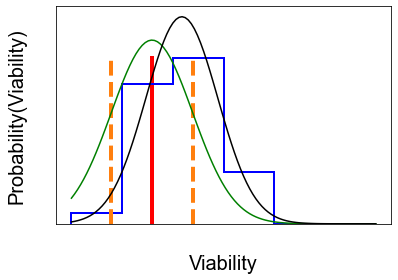

In [53]:

plt.ylabel('Probability(Viability)', fontsize=20, labelpad=30)
plt.xlabel('Viability', fontsize=20, labelpad=30)
plt.yticks([])
plt.xticks([])


i=2
    

x_min = 0.0
x_max = 1.5


    
    
x2 = [i for i in CSN_new['Viability Fraction ']][i]
x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
mean = [i for i in CSN_new['Viability Fraction ']][i]
std = [i for i in CSN_new_err][i]
    
    
M =np.mean(out[:, 1, 0, i])
variance= np.var(out[:, 1, 0, i])
sigma1 = np.sqrt(variance)
    
Diff = abs(M-x2)
    
    
W = stats.normaltest(out[:, 1, 0, i])
print (W)
    
A = scipy.stats.ttest_1samp(out[:, 1, 0, i], x2)
    #print (A)
    


plt.hist(out[:, 1, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, lw=2)
    
plt.plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
plt.plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
plt.plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)
    
plt.plot(x,y, color='green')
  
y1 = scipy.stats.norm.pdf(x,M,sigma1)
plt.plot(x,y1, color='black')
    
plt.legend(framealpha=0.0,fontsize=14)

#plt.set_aspect('auto')

#plt.ylim([0, 7])
#plt.xlim([-0.2, 1.5])

plt.xticks()
plt.yticks()

#plt.show()
plt.savefig('Fig3.pdf', transparent=True, format='pdf', bbox_inches='tight')        